In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
df = pd.read_csv('/content/hasil_preprocessing_review.csv')
df.head()

,Unnamed: 0,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,0,2025-10-18 07:12:44,Amanah Lawfirm,5,on banget,on banget,on banget,dong banget,"['dong', 'banget']",['banget'],banget
1,1,2025-10-18 07:11:35,Abdul Azid,5,luar biasa,luar biasa,luar biasa,luar biasa,"['luar', 'biasa']",[],NaN
2,2,2025-10-18 07:09:36,Safwan Hasbi,5,👍🏻,NaN,NaN,NaN,[],[],NaN
3,3,2025-10-18 07:07:46,Aku Benar,4,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,aplikasi nya bagus bisa serba guna tapi buat u...,"['aplikasi', 'nya', 'bagus', 'bisa', 'serba', ...","['bagus', 'serba', 'upgrade', 'bayar', 'mahal']",bagus serba upgrade bayar mahal
4,4,2025-10-18 07:05:36,Anggerjiwa Pusaka,5,good,good,good,good,['good'],['good'],good


In [11]:
df = df.dropna(subset=['steming_data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1357 entries, 0 to 1419
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1357 non-null   int64 
 1   Date              1357 non-null   object
 2   Username          1357 non-null   object
 3   Rating            1357 non-null   int64 
 4   Review Text       1357 non-null   object
 5   cleaning          1357 non-null   object
 6   case_folding      1357 non-null   object
 7   normalisasi       1357 non-null   object
 8   tokenize          1357 non-null   object
 9   stopword removal  1357 non-null   object
 10  steming_data      1357 non-null   object
dtypes: int64(2), object(9)
memory usage: 127.2+ KB


In [12]:
tfidf= TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data'])

#**K-Means**

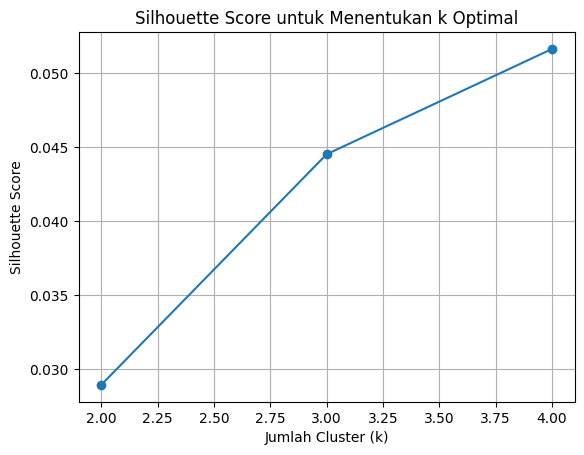

In [13]:
range_n_clusters = range(2, 5)
scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range_n_clusters, scores, marker='o')
plt.title('Silhouette Score untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [14]:
range_n_clusters = range(2, 5)
wcss = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

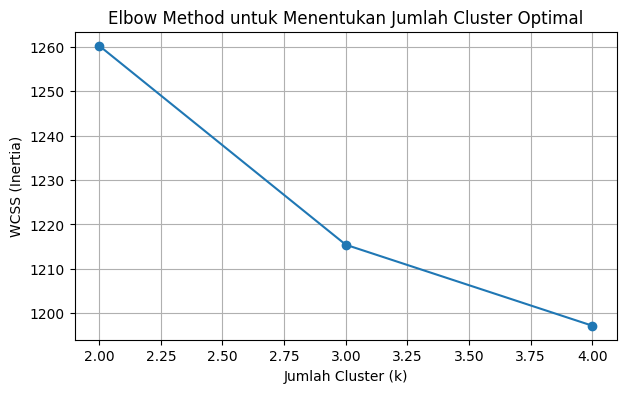

In [15]:
plt.figure(figsize=(7,4))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [17]:
best_k = list(range_n_clusters)[np.argmax(scores)]
print(f'K optimal berdasarkan Silhouette Score: {best_k}')
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
df_cluster = pd.DataFrame({
	'cleaned_text': df['steming_data'],
	'cluster': clusters
})
final_score = silhouette_score(X, df_cluster['cluster'])
print(f'Silhouette Score (k={best_k}): {final_score:.4f}')

K optimal berdasarkan Silhouette Score: 4
Silhouette Score (k=4): 0.0516


In [19]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
df_cluster = pd.DataFrame({
    'cleaned_text': df['steming_data'],
    'cluster': clusters
})
df_cluster

,cleaned_text,cluster
0,banget,0
3,bagus serba upgrade bayar mahal,0
4,good,0
5,bagus banget,1
6,bantu,2
...,...,...
1415,bangun,0
1416,ajak santai komunikasi asa obrol teman,0
1417,informasi sesuai,0
1418,limit mulu tolol,0


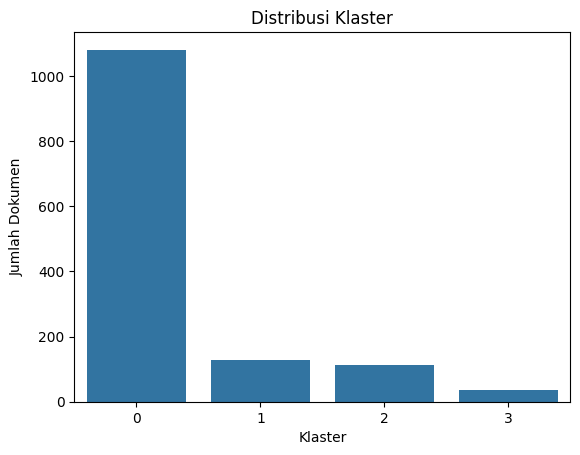

In [21]:
sns.countplot(x='cluster', data=df_cluster)
plt.title('Distribusi Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Dokumen')
plt.show()

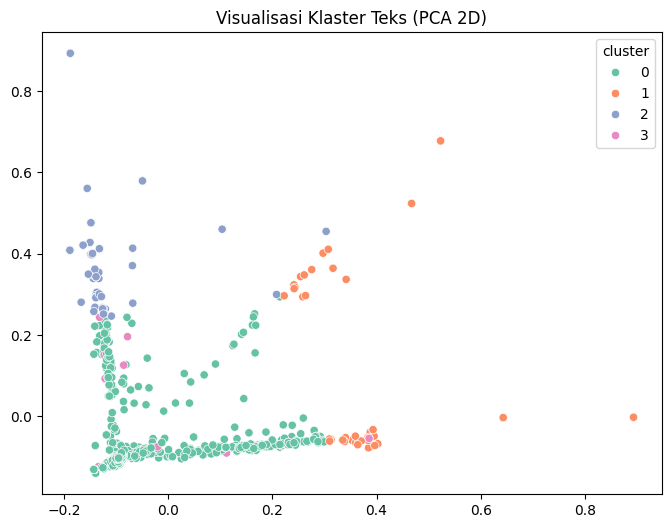

In [22]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df_cluster['cluster'], palette='Set2')
plt.title('Visualisasi Klaster Teks (PCA 2D)')
plt.show()

# **LDA (Latent Dirichlet Allocation)**

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['steming_data'])

In [28]:
lda = LatentDirichletAllocation(
    n_components=4, random_state=42)

lda.fit(X)

LatentDirichletAllocation(n_components=4, random_state=42)

In [29]:
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topik {idx+1}:")
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

display_topics(lda, feature_names)

Topik 1:
good, bagus, and, manfaat, suka, this, its, fitur, edit, not

Topik 2:
bantu, mantap, tolong, terimakasih, tugas, kerja, mudah, keren, baik, update

Topik 3:
bantu, banget, salah, jawab, jelek, baik, batas, bayar, update, respon

Topik 4:
bagus, banget, bantu, kasih, ajar, guna, teman, terima, pokok, suka

